In [1]:
import os
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = (10,10)
sns.set(rc={'figure.figsize' : (15,10)})
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기 및 탐색

## 1-1. Credit Card Fraud 데이터 세트 불러오고 'data'라는 이름의 변수에 저장하기

In [5]:
data = pd.read_csv(os.path.join('..', 'W06', 'data.csv'))

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1-2. 데이터 세트 결측치 및 Class 변수의 분포 확인하기

In [8]:
# 결측치 자체는 없어 보임
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

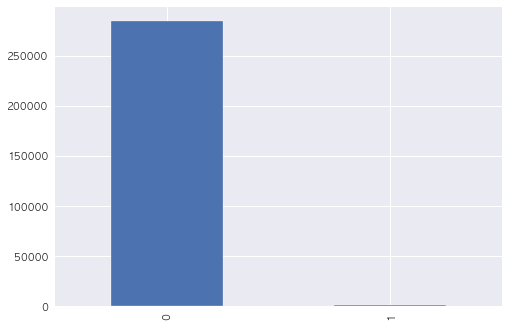

0    284315
1       492
Name: Class, dtype: int64

In [99]:
# class 변수 분포 확인
# 매우 불균형한 상태
data['Class'].value_counts().plot.bar()
plt.show()
data['Class'].value_counts()

## 1-3.	Amount와 Time 변수에 대하여 Distribution Plot 그리기 

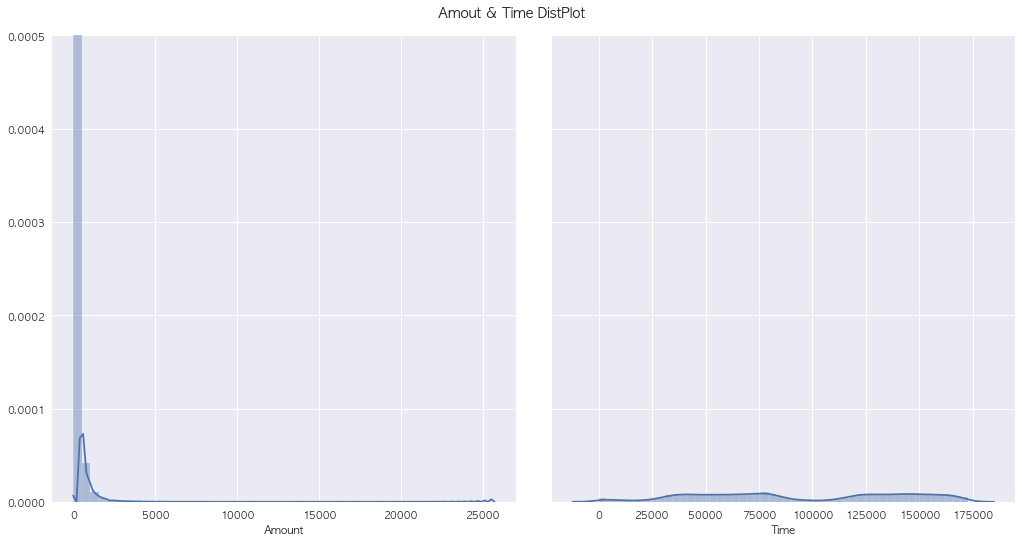

In [79]:
# Amount와 Time의 분포
f, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
sns.distplot(data.Amount, ax = ax[0])
ax[0].set_ylim(0,0.001)
sns.distplot(data.Time, ax = ax[1])
ax[1].set_ylim(0,0.0005)
plt.suptitle('Amout & Time DistPlot', fontsize = 14)
plt.tight_layout(3)
plt.show()

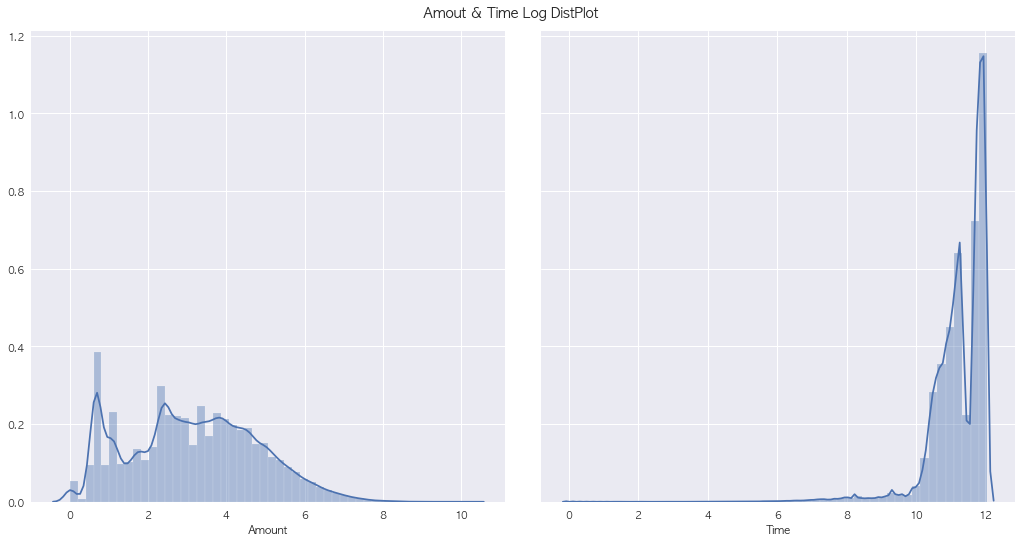

In [80]:
f, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
sns.distplot(np.log(data.Amount + 1), ax = ax[0])
sns.distplot(np.log(data.Time + 1), ax = ax[1])
plt.suptitle('Amout & Time Log DistPlot', fontsize = 14)
plt.tight_layout(3)
plt.show()

## 1-4.	Amount와 Time 변수를 RobustScaler를 이용하여 스케일링하기
 * Robust Scaling: (x - median) / IQR


In [85]:
from sklearn.preprocessing import RobustScaler

In [86]:
scaler = RobustScaler()

In [90]:
data[['Amount', 'Time']] = scaler.fit_transform(data[['Amount', 'Time']])

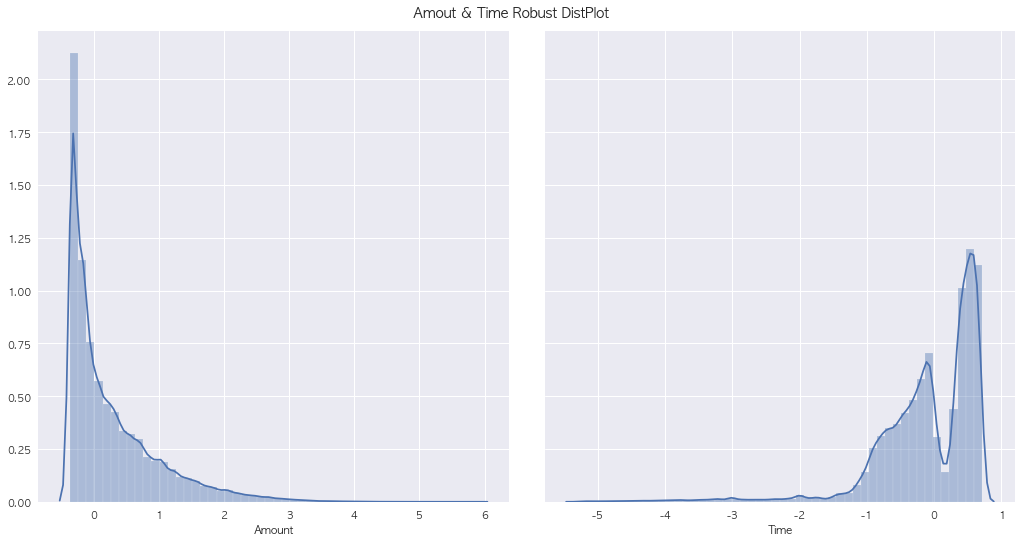

In [92]:
f, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
sns.distplot(np.log(data.Amount + 1), ax = ax[0])
sns.distplot(np.log(data.Time + 1), ax = ax[1])
plt.suptitle('Amout & Time Robust DistPlot', fontsize = 14)
plt.tight_layout(3)
plt.show()

# 2. 데이터 샘플링

## 2-1.	Class의 비율이 50:50 되도록 Undersampling 후 새로운 데이터 세트 'new_data' 생성


In [93]:
from imblearn.under_sampling import *

In [95]:
X = data.drop('Class', axis = 1)
Y = data.Class

In [96]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_sample(X, Y)

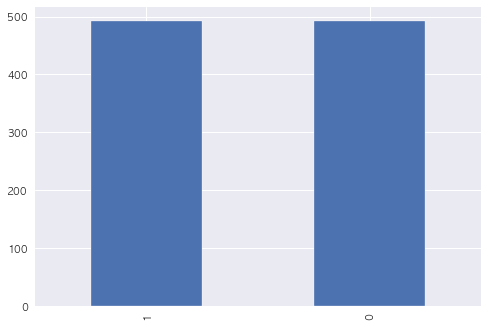

In [101]:
y_samp.value_counts().plot.bar()
plt.show()

## 2-2.언더샘플링 진행 후 다시 Time과 Amout 분포 확인

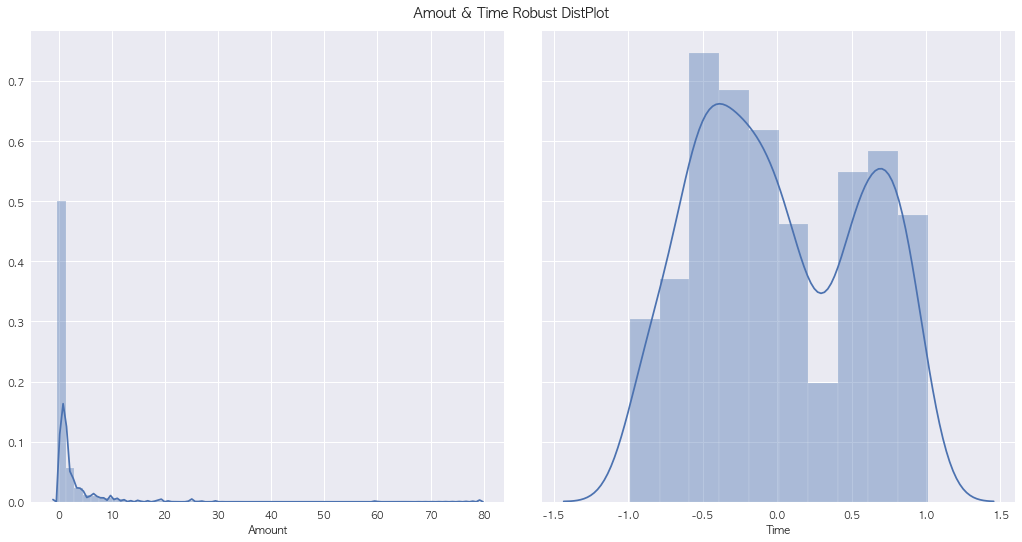

In [103]:
f, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
sns.distplot(X_samp.Amount, ax = ax[0])
sns.distplot(X_samp.Time, ax = ax[1])
plt.suptitle('Amout & Time Robust DistPlot', fontsize = 14)
plt.tight_layout(3)
plt.show()

# 3. 이상치 제거

## 3-1. 새로운 데이터 세트 'new_data'에 대하여 Heatmap을 그려 상관관계 살펴보기

In [162]:
new_data = pd.concat([X_samp, y_samp], axis = 1)

In [115]:
cor = new_data.corr()

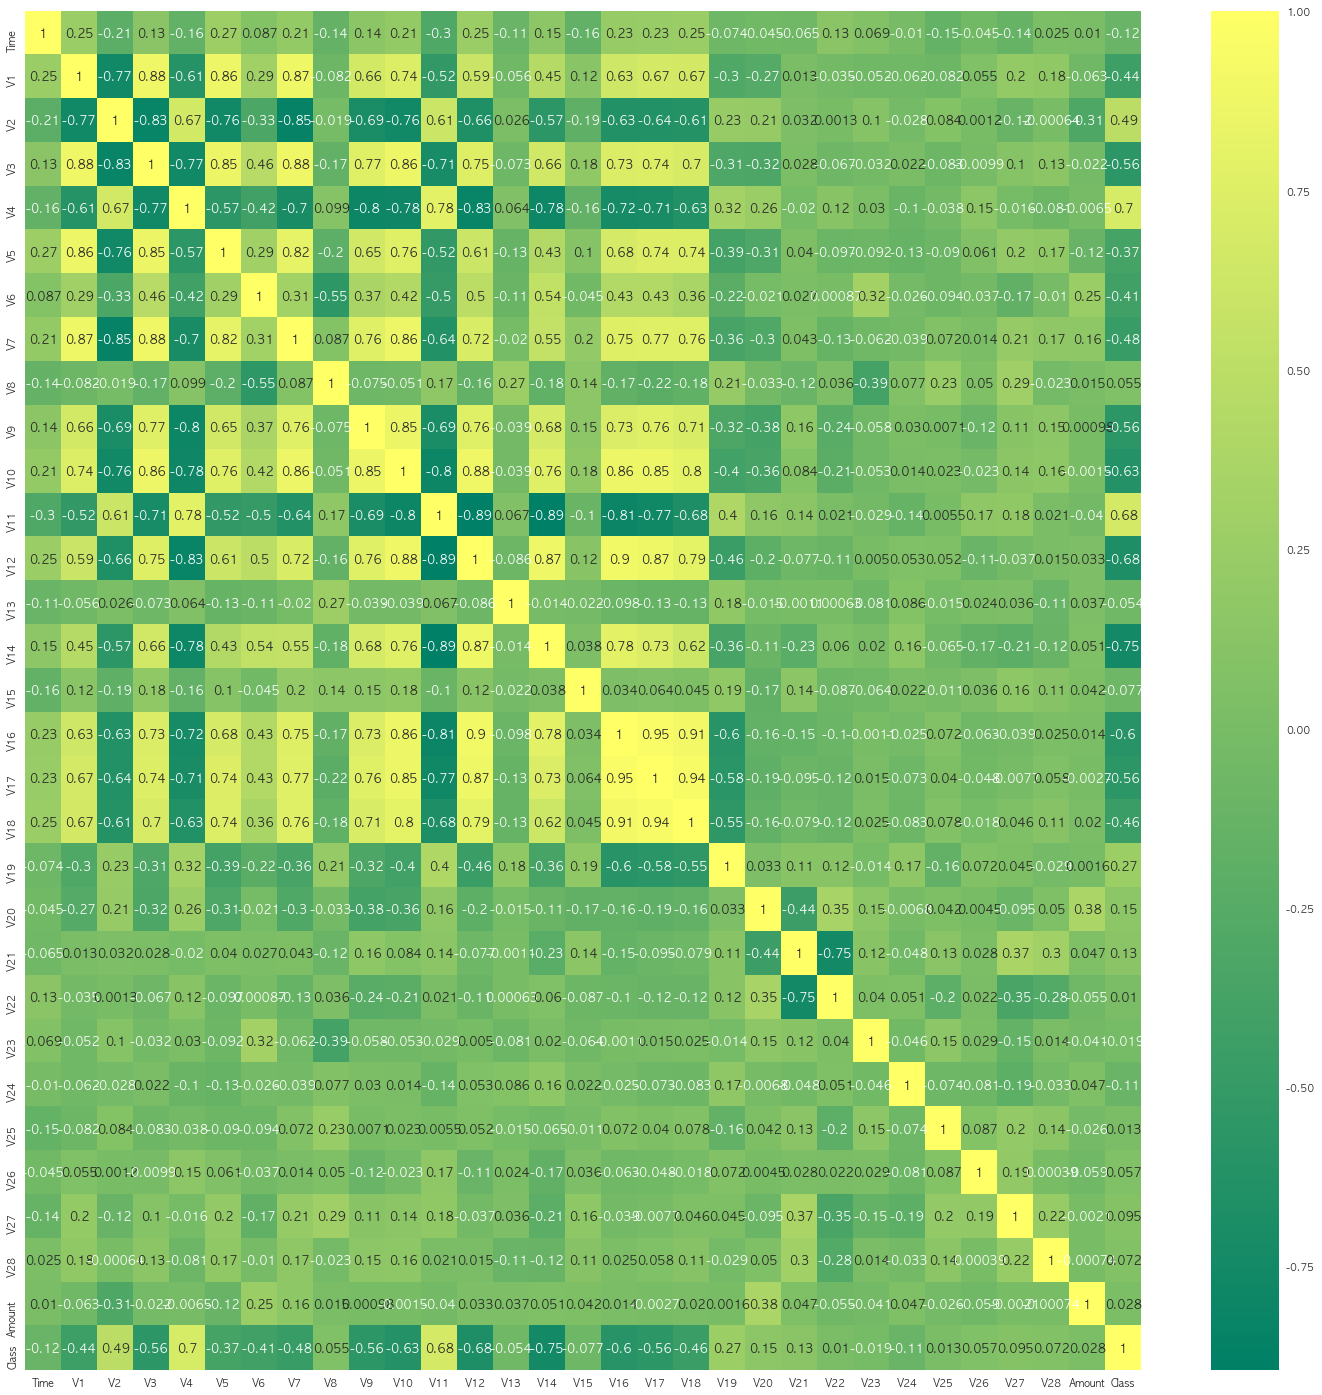

In [116]:
plt.figure(figsize = (25,25))
sns.heatmap(cor, annot = True, cmap = 'summer')
plt.show()

## 3-2.	Class 변수에 대한 boxplot 그려보기

- 상대적으로 양의 상관관계가 높은 V2, V4, V11, V19
- 음의 상관관계가 높은 V10, V12, V14, V17

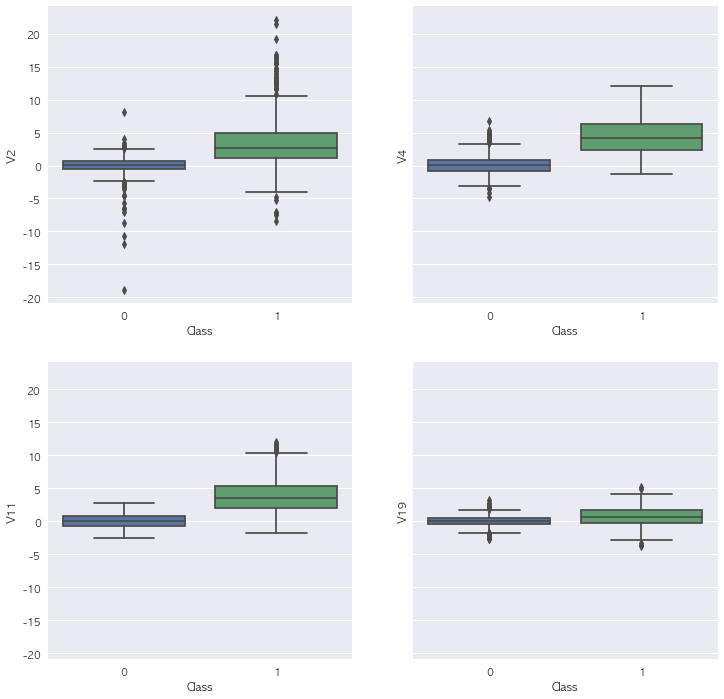

In [138]:
f, ax = plt.subplots(2,2, figsize = (12, 12), sharey=True)
sns.boxplot(x = 'Class', y = 'V2', data = new_data, ax = ax[0][0])
sns.boxplot(x = 'Class', y = 'V4', data = new_data, ax = ax[0][1])
sns.boxplot(x = 'Class', y = 'V11', data = new_data, ax = ax[1][0])
sns.boxplot(x = 'Class', y = 'V19', data = new_data, ax = ax[1][1])
plt.show()

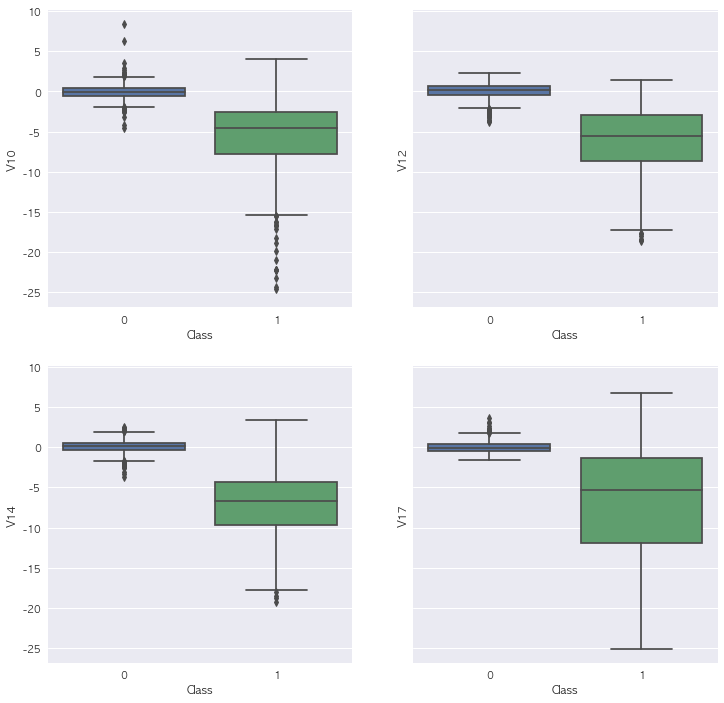

In [139]:
f, ax = plt.subplots(2,2, figsize = (12, 12), sharey=True)
sns.boxplot(x = 'Class', y = 'V10', data = new_data, ax = ax[0][0])
sns.boxplot(x = 'Class', y = 'V12', data = new_data, ax = ax[0][1])
sns.boxplot(x = 'Class', y = 'V14', data = new_data, ax = ax[1][0])
sns.boxplot(x = 'Class', y = 'V17', data = new_data, ax = ax[1][1])
plt.show()

## 3-3.	변수 V10, V12, V14에 대하여 이상치 제거하기

* 새로운 데이터 세트에서 Class = 1인 데이터만을 추출
* V10, V12, V14에 대하여 각각 IQR 계산(IQR = Q3 - Q1)
* 계산된 IQR 각각에 대해 Q1 - (1.5 x IQR), Q3 + (1.5 x IQR)을 Cut-off 범위로 설정
* Class = 1을 만족하는 데이터 중 Cut-off 범위를 벗어나는 데이터를 제거
* 최종적으로 V10, V12, V14에 대하여 모두 이상치가 없는 데이터만 남아있게 됨


In [163]:
temp = []
for column in ['V10', 'V12', 'V14']:
    q1 = np.percentile(new_data[column], 25)
    q3 = np.percentile(new_data[column], 75)
    outlier = 1.5*(q3 - q1)
    value = [q1 - outlier, q3 + outlier]
    temp.append(value)

In [165]:
temp

[[-11.478490381313742, 6.938703907318678],
 [-14.066135319949442, 8.78963747653415],
 [-17.06125825260833, 10.510633153721736]]

In [170]:
drop_list = []
for (low, high), column in zip(temp, ['V10', 'V12', 'V14']):
    idx = new_data.loc[(new_data[column] < low) | (new_data[column] > high)].index
    drop_list.extend(idx)

In [172]:
len(drop_list)

130

In [174]:
new_data = new_data.drop(drop_list)

## 3-4. 이상치 제거 확인하기

- V10, V12, V14에 대하여 Box Plot
- Cut-off 범위를 좁힐수록 정보 손실이 커짐

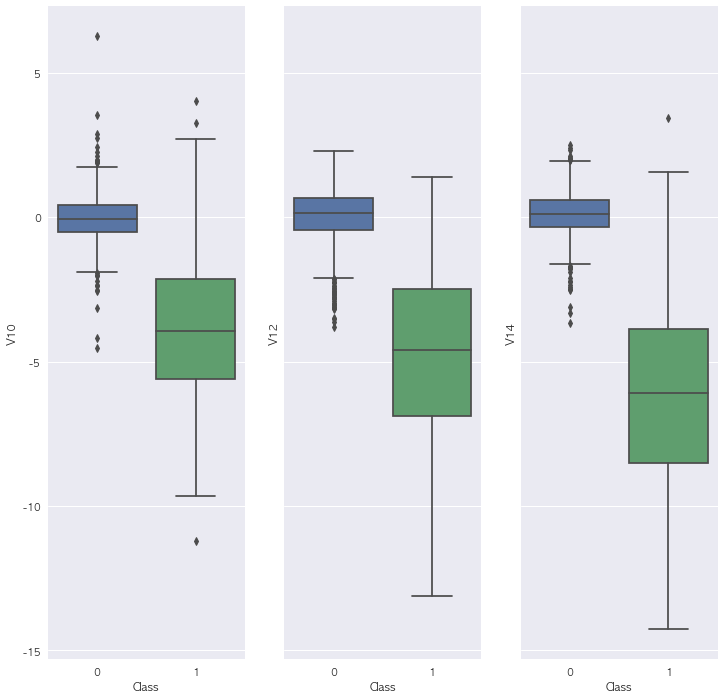

In [175]:
f, ax = plt.subplots(1,3, figsize = (12, 12), sharey=True)
sns.boxplot(x = 'Class', y = 'V10', data = new_data, ax = ax[0])
sns.boxplot(x = 'Class', y = 'V12', data = new_data, ax = ax[1])
sns.boxplot(x = 'Class', y = 'V14', data = new_data, ax = ax[2])
plt.show()

# 4. 모델링

In [4]:
import joblib

In [180]:
joblib.dump({
    'data' : data,
    'new_data' : new_data
}, os.path.join('..', 'W06', 'data.pkl'))

['../W06/data.pkl']

In [5]:
raw = joblib.load( os.path.join('..', 'W06', 'data.pkl'))

In [6]:
locals().update(raw)

## 4-1. data 구분하기

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Class', axis = 1), data['Class'], random_state = 42 )

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [13]:
x_sample_train, x_sample_test, y_sample_train, y_sample_test = train_test_split(new_data.drop('Class', axis = 1), new_data['Class'], random_state = 42 )

In [14]:
x_sample_train.shape, x_sample_test.shape, y_sample_train.shape, y_sample_test.shape

((673, 30), (225, 30), (673,), (225,))

## 4-2. sample 데이터 적용하기

In [15]:
from sklearn.pipeline import make_pipeline

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost

In [28]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rfo = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = xgboost.XGBRegressor()

In [31]:
def score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    value = model.score(x_test, y_test)
    return value

In [34]:
for model in [lr, dt, rfo, gbr, xgb]:
    v = score(model, x_sample_train, x_sample_test, y_sample_train, y_sample_test)
    print(v)

0.6693635529961905
0.694
0.781471
0.773395497812453
[23:09:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7867709186157822


In [39]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression as lr

def KFold_score(x_train, y_train):
    
    fold = KFold(n_splits=5, shuffle=False) 

    # 서로 다른 C 파라미터 설정
    c_param_range = [0.01, 0.1, 1, 10, 100]

    result = pd.DataFrame(index=np.arange(len(c_param_range)), columns=['C_parameter','Mean recall score'])
    result['C_parameter'] = c_param_range

    # K-Fold를 사용하여 최적의 C 찾아내기
    k = 0
    for c_param in c_param_range:

        recall = []
        for train_idx, val_idx in fold.split(x_train):
            
            # 각각의 C 파라미터에 대해 Logistic Regression 실행, C 값이 작을수록 강한 규제
            model_lr = lr(C=c_param, penalty='l2', max_iter=500)

            # Train 데이터에 대해 K-Fold Validation(train_idx으로 훈련하고 val_idx로 검증)
            model_lr.fit(x_train.iloc[train_idx, :], y_train.iloc[train_idx])
            y_pred = model_lr.predict(x_train.iloc[val_idx, :])
    
            # Recall 계산한 후 값을 리스트에 저장
            recall.append(recall_score(y_train.iloc[val_idx], y_pred))
    
        # 주어진 C 값에 대한 총 5개의 Recall 값의 평균을 최종 Recall로 설정 
        result.iloc[k, 1] = np.mean(recall)
        k += 1
    return result


In [40]:
# Mean recall score가 가장 높은 C 값을 선택
KFold_score(x_sample_train, y_sample_train)

,C_parameter,Mean recall score
0,0.01,0.829856
1,0.10,0.872337
2,1.00,0.887794
3,10.00,0.904602
4,100.00,0.895201


In [43]:
# Recall을 최대화하는 Threshold 값 찾기
model_lr = lr(C=10, penalty='l2', max_iter=300)
model_lr.fit(x_sample_train, y_sample_train)

y_pred_prob = model_lr.predict_proba(x_sample_test)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

result = pd.DataFrame(index=np.arange(len(thresholds)), columns=['Thresholds', 'Recall score'])
result['Thresholds'] = thresholds

k = 0
# 부정 사용(Class=1)에 대한 예측 확률이 Threshold보다 높은 경우 부정 사용으로 취급
for threshold in thresholds:
    y_pred_above_threshold = y_pred_prob[:, 1] > threshold
    y_pred_above_threshold = np.where(y_pred_above_threshold, 1, 0)
    
    result.iloc[k, 1] = recall_score(y_sample_test, y_pred_above_threshold)
    k += 1    

result

,Thresholds,Recall score
0,0.1,0.93
1,0.2,0.92
2,0.3,0.91
3,0.4,0.9
4,0.5,0.89
5,0.6,0.88
6,0.7,0.87
7,0.8,0.86
8,0.9,0.84


In [44]:
# 위에서 찾은 Threshold 값을 활용하여 모델 평가 (Threshold = 0.1)
y_pred_prob = model_lr.predict_proba(x_test)
y_pred_above_threshold = y_pred_prob[:, 1] > 0.1
y_pred_above_threshold = np.where(y_pred_above_threshold, 1, 0)

recall_score(y_test, y_pred_above_threshold)

0.9734513274336283